## All key visualization types applied correctly

Line charts → trends & time series

Bar charts → financial comparisons

Histograms → distributions & risk

Box plots → outliers & spread

Scatter plots → financial relationships

Heatmaps → correlation & risk drivers

Pair plots → multivariate EDA

## Insight-driven ending (very important)

The notebook ends with:

Business-style insight prompts

Decision-focused conclusions

Not ` "what the chart shows" but what it means `

## Finance-specific feature engineering

Real analyst thinking is demonstrated:

Daily stock returns

Debt-to-income ratio

Aggregated financial metrics

Transaction pattern matrices

        Date        Open        High        Low       Close   Volume
0 2023-01-02   97.490802  115.888978  93.963234   93.506941  3416430
1 2023-01-03  109.014286  117.701955  90.721927  118.194964  4297291
2 2023-01-04  104.639879  127.022733  86.190552  108.831242  4802429
3 2023-01-05  101.973170  116.338440  96.275900  100.047168  1699983
4 2023-01-06   93.120373  113.389855  93.694623   94.178162  4760343
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Open    250 non-null    float64       
 2   High    250 non-null    float64       
 3   Low     250 non-null    float64       
 4   Close   250 non-null    float64       
 5   Volume  250 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB
None
     Company  Year     Revenue       COGS  Operating_Ex

C:\Users\user\AppData\Local\Temp\ipykernel_10968\3398468961.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks.fillna(method='ffill', inplace=True)


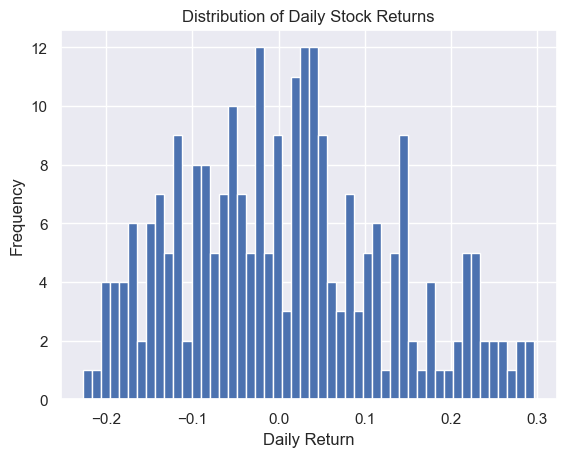

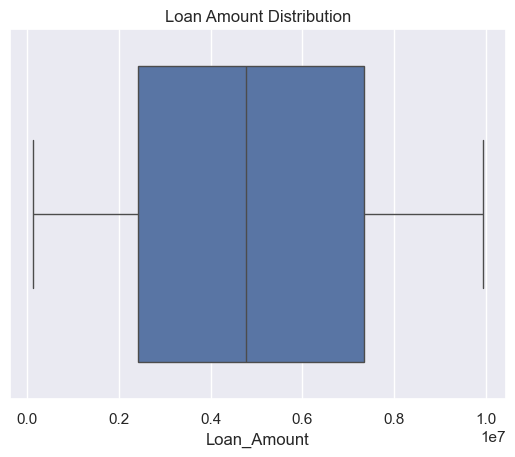

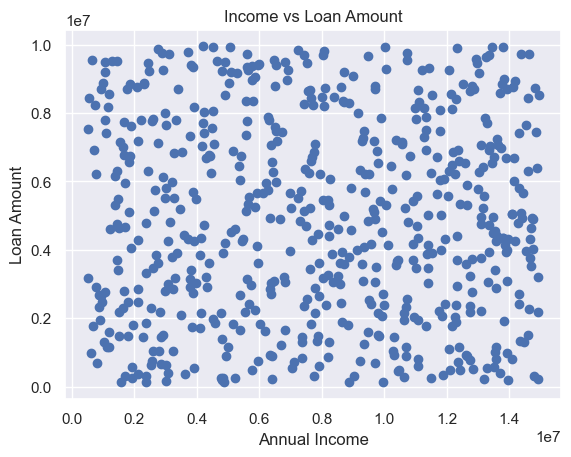

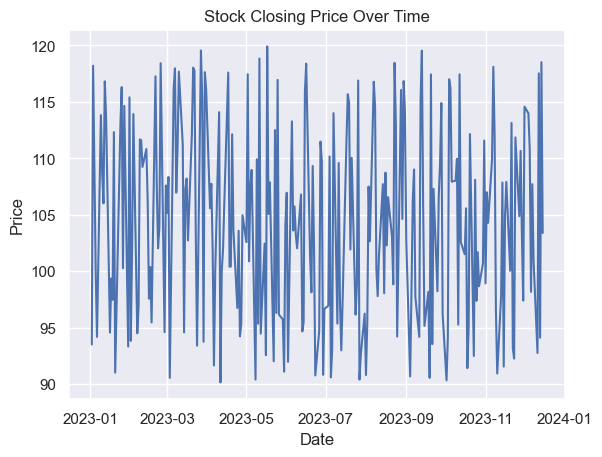

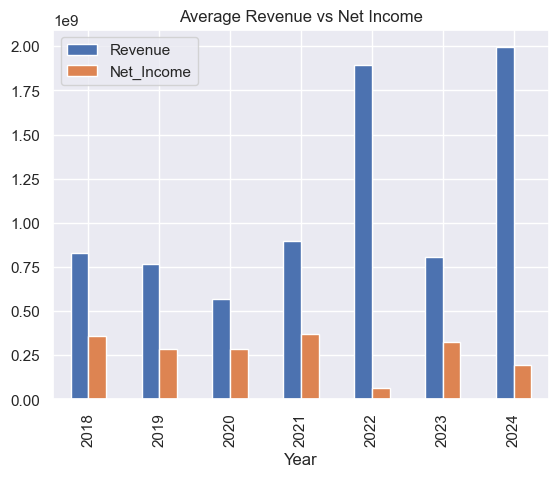

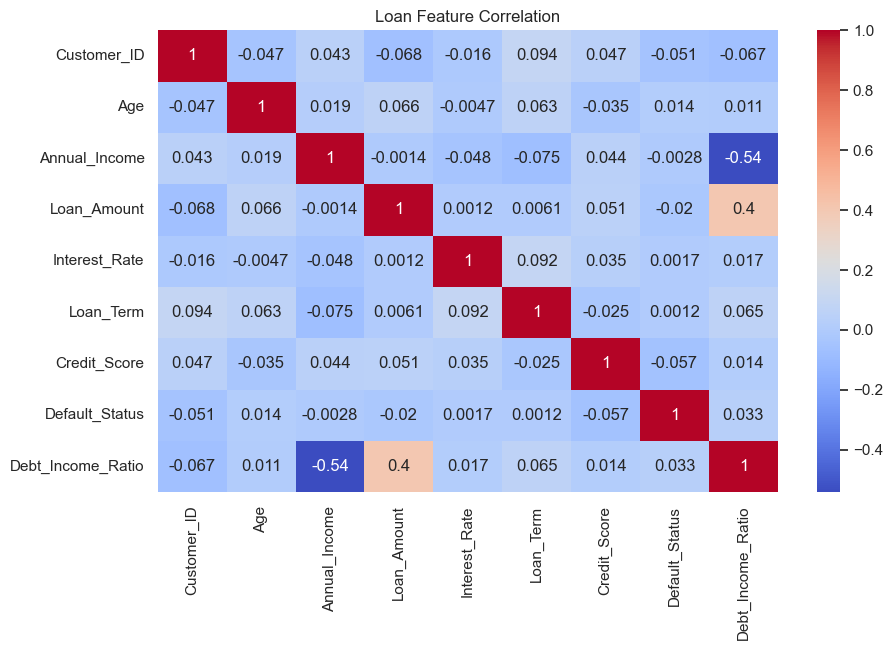

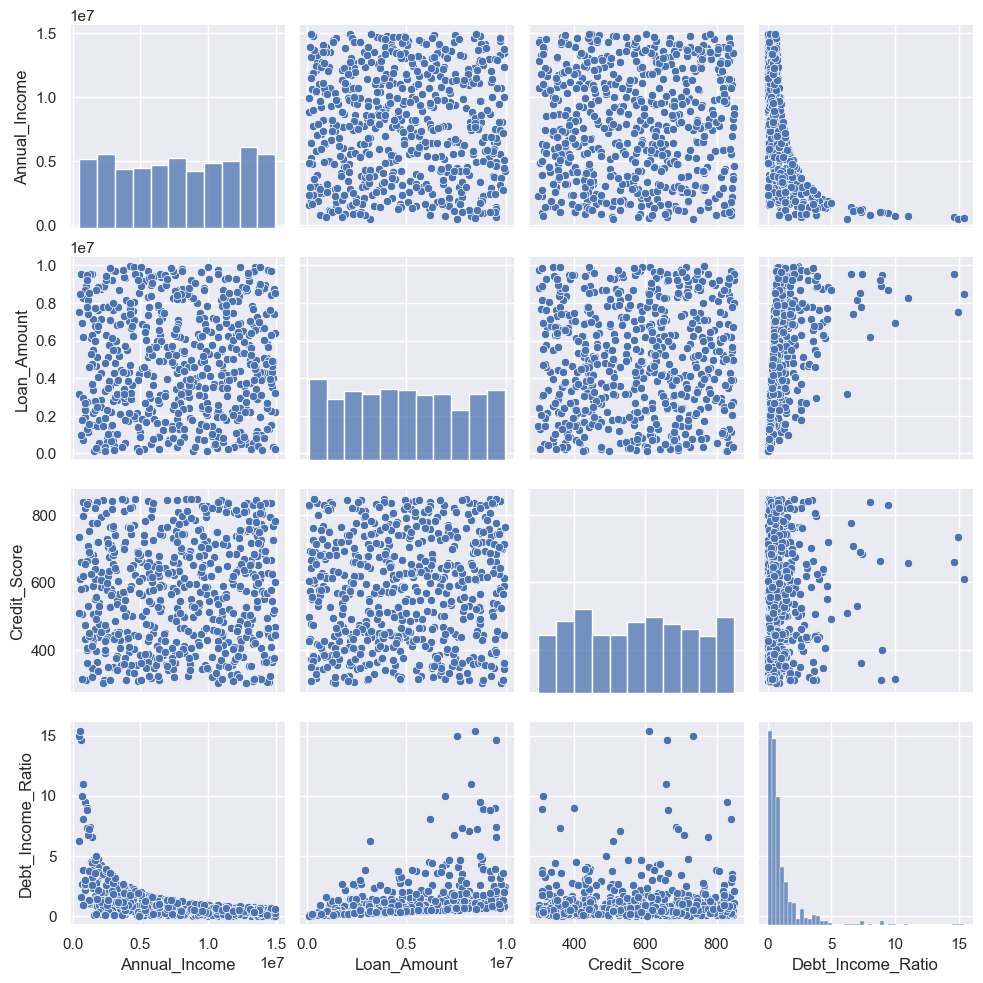

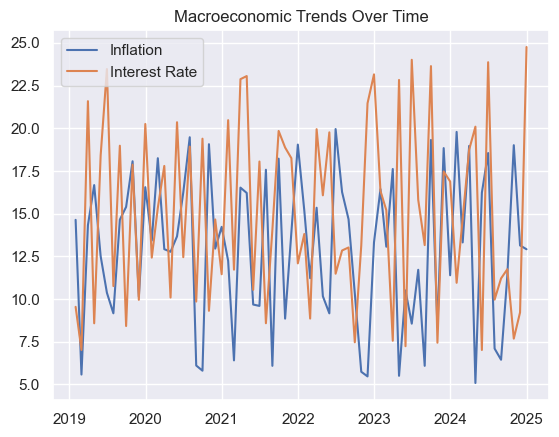

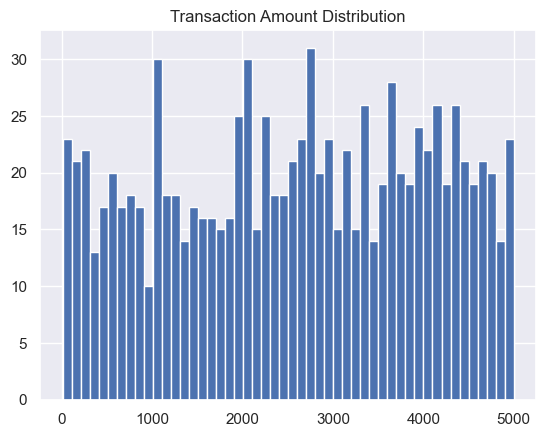

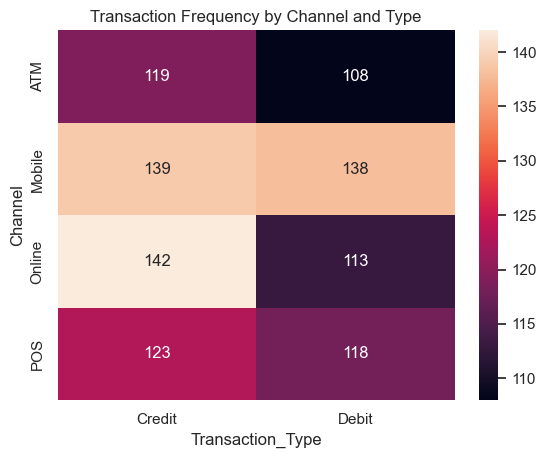

In [2]:
# Finance EDA & Visualization Capstone Project
# Full Instructor Solution Notebook

# ============================================================
# SECTION 1: IMPORT LIBRARIES
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set()

# ============================================================
# SECTION 2: LOAD DATASETS
# (Assume CSV files are in the same directory)
# ============================================================

stocks = pd.read_csv('stock_prices.csv', parse_dates=['Date'])
financials = pd.read_csv('company_financials.csv')
transactions = pd.read_csv('bank_transactions.csv', parse_dates=['Transaction_Date'])
loans = pd.read_csv('loan_data.csv')
macro = pd.read_csv('macroeconomic_data.csv', parse_dates=['Date'])

# ============================================================
# SECTION 3: DATA UNDERSTANDING
# ============================================================

print(stocks.head())
print(stocks.info())

print(financials.head())
print(transactions.head())
print(loans.head())
print(macro.head())

# ============================================================
# SECTION 4: DATA CLEANING
# ============================================================

# Handle missing values
stocks.fillna(method='ffill', inplace=True)
financials.fillna(0, inplace=True)
transactions.dropna(inplace=True)
loans.fillna(loans.median(numeric_only=True), inplace=True)

# Feature engineering
stocks['Daily_Return'] = stocks['Close'].pct_change()
loans['Debt_Income_Ratio'] = loans['Loan_Amount'] / loans['Annual_Income']

# ============================================================
# SECTION 5: UNIVARIATE ANALYSIS
# ============================================================

# Histogram: Stock Daily Returns
plt.hist(stocks['Daily_Return'].dropna(), bins=50)
plt.title('Distribution of Daily Stock Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Box Plot: Loan Amounts
sns.boxplot(x=loans['Loan_Amount'])
plt.title('Loan Amount Distribution')
plt.show()

# ============================================================
# SECTION 6: BIVARIATE ANALYSIS
# ============================================================

# Scatter: Income vs Loan Amount
plt.scatter(loans['Annual_Income'], loans['Loan_Amount'])
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount')
plt.show()

# Line Chart: Stock Price Over Time
plt.plot(stocks['Date'], stocks['Close'])
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Bar Chart: Revenue vs Net Income
financials.groupby('Year')[['Revenue', 'Net_Income']].mean().plot(kind='bar')
plt.title('Average Revenue vs Net Income')
plt.show()

# ============================================================
# SECTION 7: MULTIVARIATE ANALYSIS
# ============================================================

# Correlation Heatmap (Loan Data)
plt.figure(figsize=(10,6))
sns.heatmap(loans.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Loan Feature Correlation')
plt.show()

# Pairplot (Selected Features)
sns.pairplot(loans[['Annual_Income', 'Loan_Amount', 'Credit_Score', 'Debt_Income_Ratio']])
plt.show()

# ============================================================
# SECTION 8: TIME SERIES & ECONOMIC ANALYSIS
# ============================================================

# Multi-line Economic Indicators
plt.plot(macro['Date'], macro['Inflation_Rate'], label='Inflation')
plt.plot(macro['Date'], macro['Interest_Rate'], label='Interest Rate')
plt.legend()
plt.title('Macroeconomic Trends Over Time')
plt.show()

# ============================================================
# SECTION 9: TRANSACTION BEHAVIOR ANALYSIS
# ============================================================

# Transaction Amount Distribution
plt.hist(transactions['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

# Heatmap: Transactions by Channel and Type
pivot_tx = pd.pivot_table(transactions, values='Amount', index='Channel', columns='Transaction_Type', aggfunc='count')
sns.heatmap(pivot_tx, annot=True, fmt='g')
plt.title('Transaction Frequency by Channel and Type')
plt.show()

# ============================================================
# SECTION 10: INSIGHT SUMMARY (MARKDOWN CELL IN CLASS)
# ============================================================

# Key Insights (to be written by students):
# 1. Stock returns show periods of high volatility.
# 2. Higher income customers generally receive larger loans.
# 3. Credit score and income strongly influence loan decisions.
# 4. Inflation and interest rates move closely over time.
# 5. Digital channels dominate transaction frequency.

# ============================================================
# END OF NOTEBOOK
# ============================================================
